## Imports

In [1]:
# libraries
import os
import sys
import numpy as np 
from scipy import stats
# Plotting
from matplotlib import pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'
# pcarpet functions
pcarpet_path = os.path.join(os.path.dirname(os.getcwd()), 'pcarpet')
sys.path.insert(0, pcarpet_path)
import pcarpet

## Set paths to example data

In [2]:
example_folder = '/home/niko/MRI/pcarpet_example'
func = os.path.join(example_folder, 'func_preproc.nii.gz')
brain_mask = os.path.join(example_folder, 'brain_mask.nii.gz')
cortex_mask = os.path.join(example_folder, 'cortex_mask.nii.gz')
output_folder = os.path.join(example_folder, 'outputs')

## Test class


Initialized Dataset object:
	fMRI file: /home/niko/MRI/pcarpet_example/func_preproc.nii.gz
	Mask file: /home/niko/MRI/pcarpet_example/cortex_mask.nii.gz
	Output directory: /home/niko/MRI/pcarpet_example/outputs
Reading data...
	fMRI data read: dimensions (96, 96, 35, 350)
	Mask read: dimensions (96, 96, 35)
	TR of 2.085 seconds read from fMRI header
fMRI data reshaped to voxels x time (322560, 350).
46009 voxels retained after masking.
Carpet matrix created with shape (46009, 350).
Carpet normalized to zero-mean unit-variance.
Carpet reordered.
PCA fit to carpet and results saved.
First 5 PCs correlated with carpet.
Out of these, 4 sign-flipped.
First 5 PCs correlated with fMRI data.


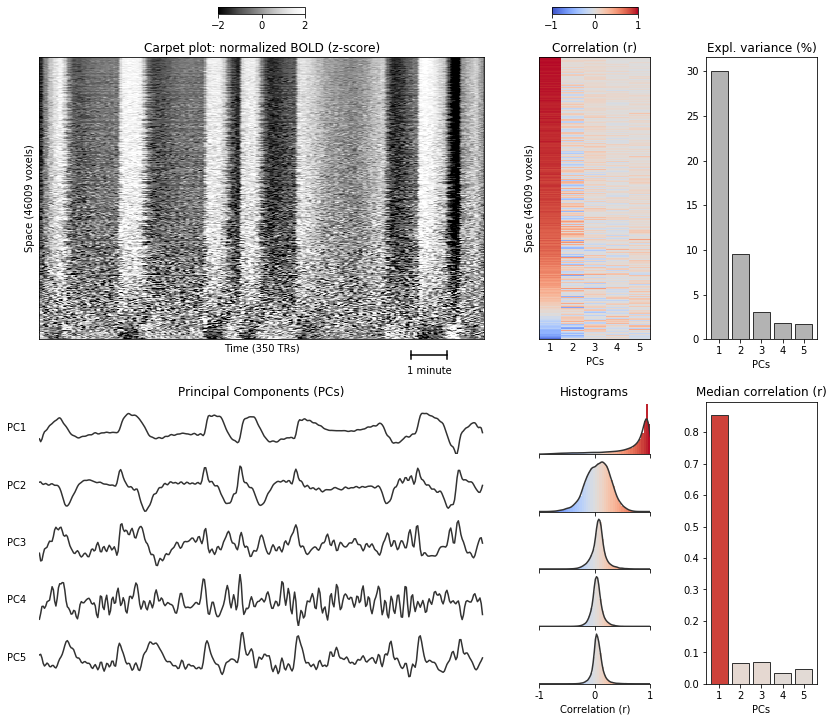

In [3]:
example = pcarpet.Dataset(func, cortex_mask, output_folder, TR='auto')
example.get_carpet(tSNR_thresh=15.0, reorder=True, save=False)
example.fit_pca2carpet(save_pca_scores=False)
example.correlate_with_carpet(ncomp=5, flip_sign=True)
example.correlate_with_fmri()
example.plot_report()